# [E-02] 다양한 데이터 분류하기

* 평가 기준
    - 3가지 데이터셋의 구성이 합리적으로 진행되었는가?
    - 3가지 데이터셋에 대해 각각 5가지 모델을 성공적으로 적용하였는가?
    - 3가지 데이터셋에 대해 모델의 평가지표가 적절히 선택되었는가?

* **시작하기 전에!**
    * 분류를 수행할 수 있는 머신러닝 알고리즘을 만들고 나면 해당 분류기가 예측을 얼마나 잘하는지 검증해야한다. 이런 분류 모델의 성능을 평가할 수 있는 다양한 지표들이 있고, 어떤 지표를 적용해야하는지에 대해서는 **'오차 행렬'**에 대해서 알아야한다.

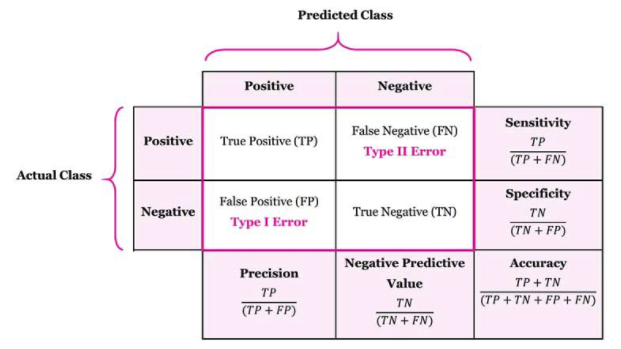

* 위 그림에서, 각 행은 실제 클래스를 나타내는데, 코로나를 예로 들어 실제 클래스가 Positive라면 환자는 실제 코로나 바이러스에 감염된 것이다. 반대로 실제 클래스가 Negative라면 환자는 건강한 것이다.

* 각 열은 예측된 클래스이다. 계속 코로나를 예로, Predicted Class가 Positive라면 진단 결과가 양성, Negative라면 진단 결과가 음성인 것을 말한다.

* 각 칸에 나타난 TP, FN, FP, TN는 다음과 같다.(코로나를 계속 예로 들었음)
    * **TP(True Positive):** 실제 환자에게 양성 진단(참 양성)
    * **FN(False Negative):** 실제 환자에게 음성 진단(거짓 음성)
    * **FP(False Positive):** 건강한 사람에게 양성 진단(거짓 양성)
    * **TN(True Negative):** 건강한 사람에게 음성 진단(참 음성)

* 위 네가지 수치로 머신러닝 알고리즘의 성능 지표를 계산할 수 있는데, 대표적으로 쓰이는 성능 지표는 정밀도(Precision), 재현율(Recall, Sensitivity), F1 스코어(f1 score) 등이 있다.

(recall은 위 그림에서 sensitivity 지표와 같다. 단, recall이라는 용어가 더 보편적임)

위 성능 지표와 정확도의 수식은,
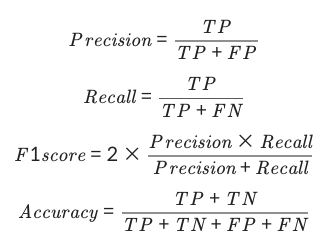

* Precision과 Recall의 분자는 둘 다 TP(참 양성)이다. 이 값은 높을 수록 좋다. 하지만 분모에 각각 FP(거짓 양성)와 FN(거짓 음성)가 있고, 이 값들은 잘못 예측한 값이므로 낮을 수록 좋다.
    * **즉, TP(참 양성)는 높고, FP(거짓 양성)와 FN(거짓 음성)은 낮을 수록 좋다.**
    
* Precision은 분모에 있는 FP(거짓 양성)가 낮을수록 커진다. **즉, Precision이 높아지려면 건강한 사람인데 양성으로 판단하는 경우가 적어야 한다.**
* Recall은 분모에 있는 FN(거짓 음성)가 낮을수록 커진다. **즉, Recall이 높으려면 양성인데 음성으로 판단하는 경우가 적어야 한다.**

* F1 score는 Recall과 Precision의 조화평균이다. 
    * 조화 평균이란 **주어진 수들의 역수의 산술평균을 구하고, 이 산술평균의 역수를 조화평균이라고 한다.**(https://ko.wikipedia.org/wiki/%EC%A1%B0%ED%99%94_%ED%8F%89%EA%B7%A0)


* Accuracy는 전체 데이터 중 올바르게 판단한 데이터 개수의 비율을 말한다.

### 1-1. digit data 준비

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
# feature data 
digits_data = digits.data
digits_data.shape

(1797, 64)

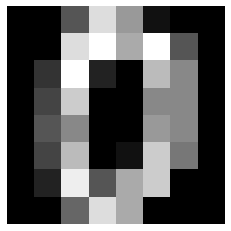

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

* **알게된 것**
    * **cmap:** color map을 뜻함. 색을 적용하는 메서드
    * **axis():** x축 y축의 범위를 지정한다. 보통은 plt.axis([xmin, xmax, ymin, ymax])
    

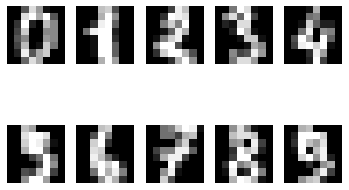

In [5]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
    
plt.show()

* **알게된 것**
    * **plt.subplot(2, 5, i+1):** 2행 5열의 subplot을 만들고 for문을 돌면서 i번째, 그리고 반복할 때마다 i+1번째 subplot을 가리킴. 

In [6]:
# target data
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
# target names
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
# 데이터 Describe
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### 1-2. digit 데이터 분리하기 

In [9]:
x_train, x_test, y_train, y_test = train_test_split(digits_data, 
                                                   digits_label,
                                                   test_size=0.2)

print('x_train 개수:', len(x_train), ', x_test 개수:', len(x_test))

x_train 개수: 1437 , x_test 개수: 360


### 1-3. 다양한 모델로 학습

In [10]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

classifier


In [11]:
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        44
           1       0.81      0.89      0.85        44
           2       0.81      0.78      0.79        32
           3       0.90      0.87      0.88        30
           4       0.91      0.82      0.86        38
           5       0.97      0.85      0.91        40
           6       0.94      0.89      0.91        36
           7       0.86      0.91      0.89        34
           8       0.73      0.73      0.73        33
           9       0.79      0.93      0.86        29

    accuracy                           0.87       360
   macro avg       0.87      0.86      0.86       360
weighted avg       0.87      0.87      0.87       360



In [12]:
# 오차행렬 구해보기
from sklearn.metrics import confusion_matrix

digit_decision_tree_cm = confusion_matrix(y_test, y_pred)
digit_decision_tree_cm

array([[43,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 39,  1,  0,  1,  0,  0,  0,  3,  0],
       [ 0,  2, 25,  2,  0,  0,  0,  0,  3,  0],
       [ 0,  0,  1, 26,  0,  1,  0,  0,  1,  1],
       [ 2,  2,  0,  0, 31,  0,  1,  1,  0,  1],
       [ 0,  0,  1,  0,  1, 34,  1,  1,  0,  2],
       [ 1,  2,  0,  0,  1,  0, 32,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 31,  0,  1],
       [ 0,  1,  3,  1,  0,  0,  0,  2, 24,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1, 27]])

In [13]:
# randomforest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        32
           3       1.00      0.93      0.97        30
           4       0.97      0.95      0.96        38
           5       1.00      0.95      0.97        40
           6       1.00      1.00      1.00        36
           7       0.92      1.00      0.96        34
           8       0.97      1.00      0.99        33
           9       0.93      0.97      0.95        29

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [14]:
# 오차행렬 구해보기
from sklearn.metrics import confusion_matrix

digit_random_forest_cm = confusion_matrix(y_test, y_pred)
digit_random_forest_cm

array([[44,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 28,  0,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0, 36,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  1, 38,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 28]])

In [15]:
# SVM
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        44
           2       0.97      1.00      0.98        32
           3       1.00      0.93      0.97        30
           4       1.00      0.97      0.99        38
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        36
           7       0.94      1.00      0.97        34
           8       0.97      1.00      0.99        33
           9       1.00      0.97      0.98        29

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [16]:
# 오차행렬 구해보기
from sklearn.metrics import confusion_matrix

digit_svm_cm = confusion_matrix(y_test, y_pred)
digit_svm_cm

array([[44,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 40,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 28]])

In [17]:
# SGD classifier
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
sgd_model.fit(x_train, y_train)
y_pred = sgd_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       0.91      0.93      0.92        44
           2       1.00      0.97      0.98        32
           3       0.90      0.90      0.90        30
           4       0.95      0.97      0.96        38
           5       0.98      1.00      0.99        40
           6       0.97      0.97      0.97        36
           7       0.97      0.97      0.97        34
           8       0.87      0.82      0.84        33
           9       0.93      0.93      0.93        29

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



In [18]:
# 오차행렬 구해보기
from sklearn.metrics import confusion_matrix

digit_sgd_cm = confusion_matrix(y_test, y_pred)
digit_sgd_cm

array([[44,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 0,  0, 31,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 27,  0,  1,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 40,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 33,  0,  0],
       [ 0,  3,  0,  2,  1,  0,  0,  0, 27,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1, 27]])

In [19]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       0.98      0.95      0.97        44
           2       0.97      0.94      0.95        32
           3       0.93      0.90      0.92        30
           4       0.95      1.00      0.97        38
           5       0.95      0.95      0.95        40
           6       1.00      1.00      1.00        36
           7       0.97      0.94      0.96        34
           8       0.97      0.91      0.94        33
           9       0.85      0.97      0.90        29

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# 오차행렬 구해보기
from sklearn.metrics import confusion_matrix

digit_logistic_regression_cm = confusion_matrix(y_test, y_pred)
digit_logistic_regression_cm

array([[44,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  2],
       [ 0,  0, 30,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 27,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 38,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 32,  0,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 30,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 28]])

* **digit 데이터 분석과 성능지표**
    * digit 데이터는 0부터 9까지 10개 숫자의 손글씨 데이터이다. 각각의 숫자를 쓴 손글씨 데이터를 맞는 숫자로 잘 분류를 하는지가 중요한데, 이 경우 FP, FN와 같이 잘못 예측한 경우가 적은 것이 좋다. 하지만 오차행렬을 통해 각각의 모델 전부 잘못 예측한 결과가 있는지 보았을 때 확연한 차이가 보이지 않았기 때문에, 잘 예측했는지를 판단할 수 있는 accuracy 수치를 digit 데이터에 적용하는 것이 좋겠다고 판단했다. 따라서 digit 데이터에서 가장 좋은 성능을 보여준 모델은 svm 모델이다. 

### 2-1. wine data 준비

In [21]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [22]:
wine = load_wine()

print(dir(wine))

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


In [23]:
# feature data
wine_data = wine.data
print(wine_data.shape)

(178, 13)


In [24]:
wine_data[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

In [25]:
# label data
wine_label = wine.target
print(wine_label.shape)

(178,)


In [26]:
wine_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [27]:
# target names
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [28]:
# data describe
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

### 2-2. wine data 분리하기

In [29]:
x_train, x_test, y_train, y_test = train_test_split(wine_data,
                                                   wine_label,
                                                   test_size=0.2,
                                                   random_state=35)
print('x_train 개수: ', len(x_train),', x_test 개수: ', len(x_test))

x_train 개수:  142 , x_test 개수:  36


### 2-3. 다양한 모델 학습

In [30]:
# decision tree

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=34)
decision_tree.fit(x_train, y_train)

y_pred = decision_tree.predict(x_test)
print(classification_report(y_test, y_pred))

x_train 개수:  142 , x_test 개수:  36
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.79      0.79      0.79        14
           2       0.89      0.80      0.84        10

    accuracy                           0.83        36
   macro avg       0.84      0.83      0.84        36
weighted avg       0.83      0.83      0.83        36



In [31]:
# 오차행렬 구해보기
from sklearn.metrics import confusion_matrix

wine_decision_tree_cm = confusion_matrix(y_test, y_pred)
wine_decision_tree_cm

array([[11,  1,  0],
       [ 2, 11,  1],
       [ 0,  2,  8]])

In [32]:
# randomforest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(x_train, y_train)

ran_y_pred = random_forest.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.79      0.79      0.79        14
           2       0.89      0.80      0.84        10

    accuracy                           0.83        36
   macro avg       0.84      0.83      0.84        36
weighted avg       0.83      0.83      0.83        36



In [33]:
# 오차행렬 구해보기
from sklearn.metrics import confusion_matrix

wine_random_forest_cm = confusion_matrix(y_test, y_pred)
wine_random_forest_cm

array([[11,  1,  0],
       [ 2, 11,  1],
       [ 0,  2,  8]])

In [34]:
# SVM
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(x_train, y_train)

y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.59      0.71      0.65        14
           2       0.38      0.30      0.33        10

    accuracy                           0.61        36
   macro avg       0.59      0.59      0.59        36
weighted avg       0.61      0.61      0.60        36



In [35]:
# 오차행렬 구해보기
from sklearn.metrics import confusion_matrix

wine_svm_cm = confusion_matrix(y_test, y_pred)
wine_svm_cm

array([[ 9,  0,  3],
       [ 2, 10,  2],
       [ 0,  7,  3]])

In [36]:
# SGD
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(x_train, y_train)

y_pred = sgd_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.56      0.71      0.63        14
           2       0.20      0.10      0.13        10

    accuracy                           0.56        36
   macro avg       0.48      0.52      0.49        36
weighted avg       0.50      0.56      0.52        36



In [37]:
# 오차행렬 구해보기
from sklearn.metrics import confusion_matrix

wine_sgd_cm = confusion_matrix(y_test, y_pred)
wine_sgd_cm

array([[ 9,  0,  3],
       [ 3, 10,  1],
       [ 1,  8,  1]])

In [38]:
# logistic regression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

y_pred = logistic_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.82      1.00      0.90        14
           2       1.00      0.80      0.89        10

    accuracy                           0.92        36
   macro avg       0.94      0.91      0.92        36
weighted avg       0.93      0.92      0.92        36



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
# 오차행렬 구해보기
from sklearn.metrics import confusion_matrix

wine_logistic_regression_cm = confusion_matrix(y_test, y_pred)
wine_logistic_regression_cm

array([[11,  1,  0],
       [ 0, 14,  0],
       [ 0,  2,  8]])

* **wine data와 성능지표**
    * wine 데이터는 feature 데이터에 따라 세 종류의 와인으로 나누는데, 바로 오차행렬을 출력해본 결과를 통해 분석을 해보자면, decision tree와 random forest 모델 외에 svm, sgd 모델은 오차행렬과 classification_report를 통해 다른 모델에 비해 정확도가 떨어지는 것을 확인했고, 로지스틱 회귀의 경우 오차행렬의 결과는 decision tree와 random forest 모델과 큰 차이는 없었지만 classification_report의 전체적인 수치가 조금씩 낮았다. 
    * 여기서 문제는 decision tree와 random forest 모델의 리포트값, 오차행렬 값이 전부 일치한다는 점인데, train과 test set 분리를 각각해서 수행해봐도 결과는 같았다.(조금 더 찾아봐야할 필요성 느낌) 
    * 결과적으로만 봤을 땐 가장 적절한 모델은 decision tree와 random forest 모델이다.

### 3-1. breast_cancer data 준비

In [40]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [41]:
breast_cancer = load_breast_cancer()
print(dir(breast_cancer))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [42]:
# feature data
cancer_data = breast_cancer.data
cancer_data.shape

(569, 30)

In [43]:
# target data
cancer_label = breast_cancer.target
cancer_label.shape

(569,)

In [44]:
# target names
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [45]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### 3-2. breast_cancer data 분리하기

In [46]:
x_train, x_test, y_train, y_test = train_test_split(cancer_data,
                                                   cancer_label,
                                                   test_size=0.2,
                                                   random_state=10)

### 3-3. 다양한 모델 학습하기

In [47]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state = 32)
decision_tree.fit(x_train, y_train)

y_pred = decision_tree.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        39
           1       0.97      0.89      0.93        75

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



In [48]:
# 오차행렬 구해보기
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[37,  2],
       [ 8, 67]])

In [49]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=32)

random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        39
           1       1.00      0.97      0.99        75

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



In [50]:
# 오차행렬 구해보기
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[39,  0],
       [ 2, 73]])

In [51]:
# svm
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)

y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88        39
           1       0.91      0.97      0.94        75

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



In [52]:
# 오차행렬 구해보기
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[32,  7],
       [ 2, 73]])

In [53]:
# sgd
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

sgd_model.fit(x_train, y_train)
y_pred = sgd_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        39
           1       0.85      1.00      0.92        75

    accuracy                           0.89       114
   macro avg       0.93      0.83      0.86       114
weighted avg       0.90      0.89      0.88       114



In [54]:
# 오차행렬 구해보기
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[26, 13],
       [ 0, 75]])

In [55]:
# logistic regression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        39
           1       0.96      0.93      0.95        75

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
# 오차행렬 구해보기
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[36,  3],
       [ 5, 70]])

* **breast_cancer 데이터와 성능지표**
    * 유방암 데이터는 data를 통해 유방암이 맞는지, 아닌지를 판단하는데, 이 경우 유방암이 아닌 사람을 유방암으로 잘못 판단하는 것 보다 암이 맞는데 아닌 것으로 잘못 판단하는 경우가 더 좋지않다. 따라서 FN(False Negative)가 적을수록 수치가 높은 recall 지표가 높은 모델이 좋은 모델이라고 생각한다. scikit-learn의 다섯 가지 모델 중 random forest의 recall 수치가 가장 높기 때문에 breast_cancer 데이터에서는 random forest 모델이 가장 좋은 성능을 보였다.

* **느낀점**
    * 알맞는 성능 지표를 적용하려면 데이터셋의 구성을 파악하는 것이 중요하다. 또한 데이터의 성격에 대해 생각해봐야할 것 같다. 예를 들어, 유방암 데이터의 경우 암이 아닌 환자를 암이라고 잘못 판단하는 것보다 암환자를 암이 아닌 환자로 잘못 판단할 경우가 더 위험하기 때문에 recall 수치가 높을수록 좋다는 것을 파악하는 것이 중요하고, digit 데이터와 wine 데이터는 각각의 클래스에 맞게 분류를 잘하는 정확도 자체가 좋아야한다고 판단했는데, 이 부분이 맞는지에 대해서는 계속 생각해봐야할 것 같다. 
    * 또한 오차행렬을 출력해 구체적으로 잘못 예측한 부분을 알아보고자 했는데, 위 세 데이터셋 중 명확하게 FP와 FN 중 더 중요하게 생각되는 수치가 보이는 유방암 데이터에서는 오차행렬의 의미를 확실하게 알고 분석할 수 있었지만, digit데이터는 오차행렬을 구했을 때 행과 열이 너무 많아서 의미를 잘 모르겠다. 단지 얼마나 잘못 예측했는가에 대한 부분만 보였다.
    * random_state에 대해 더 자세히 알아봐야할 필요성을 느꼈다. wine 데이터에 random forest 모델을 적용시켰을 때 특정 random_state 값에서 classification_report의 모든 수치가 1이 나왔는데, 우연의 일치로 정확도가 완벽했던 것인지, 과대적합이 된건지 알 수가 없었다. 다행히 다른 값에서는 일정한 수치가 나와 해당 부분은 다른 분들과 상의해본 결과 우연의 일치인 걸로 일단락하고 넘어갔다. 조금 더 정보가 필요할 것 같다.